# Part A: aggregating and Grouping with pandas

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading dataset

df= pd.read_csv('retail_data.csv')

df.head()

,region,product_category,sales_amount,quantity_sold,month
0,East,Clothing,105.33,1,May
1,West,Home,59.94,9,Feb
2,North,Electronics,111.41,1,Mar
3,East,Electronics,118.32,3,Mar
4,East,Electronics,116.79,8,Apr


## Basic Grouping with groupby()

In [7]:
sales_per_region= df.groupby('region')['sales_amount'].sum()

sales_per_region

region
East     7827.29
North    7862.64
South    6916.63
West     8583.18
Name: sales_amount, dtype: float64

In [10]:
#sales per product_categorydf
sales_per_product_category= df.groupby('product_category')['sales_amount'].sum()

sales_per_product_category

product_category
Books          5295.19
Clothing       8370.65
Electronics    9217.31
Home           8306.59
Name: sales_amount, dtype: float64

In [12]:
Region_summary= df.groupby('region')['sales_amount'].agg(['sum','mean','min','max','count'])

Region_summary.reset_index()

,region,sum,mean,min,max,count
0,East,7827.29,101.653117,34.04,175.81,77
1,North,7862.64,106.251892,49.94,173.66,74
2,South,6916.63,101.715147,43.31,168.97,68
3,West,8583.18,105.965185,14.54,164.90,81


In [14]:
detailed_region = df.groupby(['region','product_category'])['sales_amount'].sum()

detailed_region.reset_index()

,region,product_category,sales_amount
0,East,Books,963.21
1,East,Clothing,2040.18
2,East,Electronics,2617.60
3,East,Home,2206.30
4,North,Books,1121.29
5,North,Clothing,2273.95
6,North,Electronics,1976.14
7,North,Home,2491.26
8,South,Books,1187.80
9,South,Clothing,1688.35


In [17]:
# Create custom aggregation functions
def sales_range(x):
  return x.max() - x.min()


custom_agg = df.groupby('region')['sales_amount'].agg({
'total': 'sum',
'average': 'mean',
'range': sales_range
})

SpecificationError: nested renamer is not supported

## pivot tables

In [20]:
pivot_sales=df.pivot_table(
    index= 'region',
    values= 'sales_amount',
    columns= 'month',
    fill_value= 0,
    aggfunction= 'sum'
)

pivot_sales

TypeError: DataFrame.pivot_table() got an unexpected keyword argument 'aggfunction'

### Ranking and Sorting

In [21]:
top_regions= df.groupby(['region','product_category'])['sales_amount'].sum().sort_values(ascending= False)

top_regions

region  product_category
East    Electronics         2617.60
West    Electronics         2549.34
North   Home                2491.26
West    Clothing            2368.17
North   Clothing            2273.95
East    Home                2206.30
South   Electronics         2074.23
East    Clothing            2040.18
West    Books               2022.89
North   Electronics         1976.14
South   Home                1966.25
        Clothing            1688.35
West    Home                1642.78
South   Books               1187.80
North   Books               1121.29
East    Books                963.21
Name: sales_amount, dtype: float64

In [22]:
# practise exercise

# part B: visualizing data with ,matplotlib and seaborn

# 📊 Matplotlib Basics

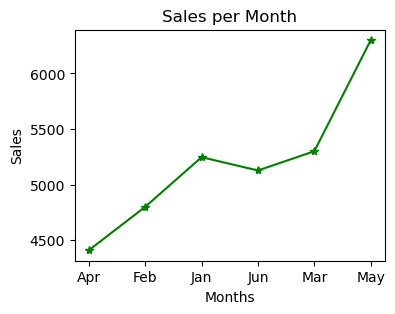

In [33]:
plt.figure(figsize=(4,3))
plt.plot(sales_per_month.index, sales_per_month.values,color='green',marker='*')
plt.title("Sales per Month")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()